# 基本概念
规则学习是从训练数据中学习出一组能用于对未见示例进行判别的规则

规则可分为两类：命题规则和一阶规则

命题规则由原子命题和逻辑连接词构成简单陈述句。

一阶规则基本成分是能描述事物的属性或关系的原子公式，能够表达复杂的关系，也被称为关系型规则

命题规则是一阶规则的特例，一阶规则的学习比命题规则复杂。


规则学习的优点有：

    与神经网络、SVM这样的黑箱模型比，规则学习具有更好的解释性，能使用户更加直观地对判别过程有所了解。
    
    数理逻辑具有极强的表达能力，绝大数人类知识都可通过数理逻辑进行简洁的刻画和表达
    
    逻辑规则的抽象描述在处理一些高度复杂的AI任务时具有显著的优势
    
    


# 序贯覆盖
一般有两种策略：

自顶向下：从比较一般的规则开始，逐渐添加新文字以缩小规则覆盖范围，直到满足预定条件为止，“生成测试法”，容易产生泛化性能好的规则

自底向上：从比较特殊的规则开始，逐渐删除文字以扩大规则覆盖范围，直到满足条件为止，更适用于训练样本较少的情形，在假设空间非常复杂的任务上使用




# 剪枝优化

剪枝优化的目的是缓解过拟合风险，方法有预剪枝，后剪枝。

后剪枝最常用策略是减错剪枝(REP)
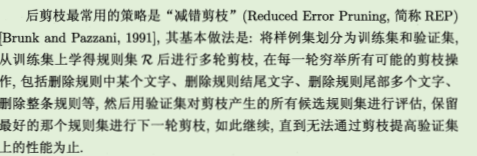

REP方法是一种比较简单的后剪枝的方法，在该方法中，可用的数据被分成两个样例集合：

一个训练集用来形成学习到的决策树，一个分离的验证集用来评估这个决策树在后续数据上的精度，确切地说是用来评估修剪这个决策树的影响。

这个方法的动机是：即使学习器可能会被训练集中的随机错误和巧合规律所误导，但验证集合不大可能表现出同样的随机波动。所以验证集可以用来对过度拟合训练集中的虚假特征提供防护检验。该剪枝方法考虑将书上的每个节点作为修剪的候选对象，决定是否修剪这个结点有如下步骤组成：

1：删除以此结点为根的子树

2：使其成为叶子结点

3：赋予该结点关联的训练数据的最常见分类

4：当修剪后的树对于验证集合的性能不会比原来的树差时，才真正删除该结点因为训练集合的过拟合，使得验证集合数据能够对其进行修正，反复进行上面的操作，从底向上的处理结点，删除那些能够最大限度的提高验证集合的精度的结点，直到进一步修剪有害为止(有害是指修剪会减低验证集合的精度)。

REP是最简单的后剪枝方法之一，不过由于使用独立的测试集，原始决策树相比，修改后的决策树可能偏向于过度修剪。这是因为一些不会再测试集中出现的很稀少的训练集实例所对应的分枝在剪枝过如果训练集较小，通常不考虑采用REP算法。尽管REP有这个缺点，不过REP仍然作为一种基准来评价其它剪枝算法的性能。它对于两阶段决策树学习方法的优点和缺点提供了了一个很好的学习思路。由于验证集合没有参与决策树的创建，所以用REP剪枝后的决策树对于测试样例的偏差要好很多，能够解决一定程度的过拟合问题。



# 一阶规则学习

当超越了命题逻辑的表达能力，需要用一阶逻辑表示，并且要使用一节规则学习。

FOIL(First-Order Inductive Learner)算法是著名的一阶规则学习算法，它遵循序贯覆盖框架旦采用自顶向下的规则归纳策略。

FOIL可大致看作命题规则学习与归纳逻辑程序设计之间的过渡，其自顶向下的规则生成过程不能支持函数和逻辑表达式嵌套，因此规则表达能力仍有不足;但它是把命题规则学习过程通过变量替换等操作直接转化为一阶规则学习，因此比一般归纳逻辑程序设计技术更高效。

# 归纳逻辑程序设计(ILP)
  归纳逻辑程序设计(Inductive Logic Programmi, ILP) 在一阶规则学习中引入了函数和逻辑表达式嵌套
  
## 最小一般泛化  
归纳逻辑程序设计采用自底向上的规则生成策略，直接将一个或多个正例所对应的具体事实(grounded fact)作为初始规则，再对规则逐步进行泛化以增加其对样例的覆盖率。泛化操作可以是将规则中的常量替换为逻辑变量，也可以是删除规则体中的某个文字。



## 逆归结

归结、逆归结都能容易地扩展为一阶逻辑形式;与命题逻辑的主要不同之处是，一阶逻辑的归结、逆归结通常需进行合一置换操作：置换： 用某些项来替换逻辑表达式中的变量；合一： 用一种变量置换令两个或多个逻辑表达式相等。在现实任务中，ILP系统通常先自底向上生成一组规则，然后再结合最小一般泛化与逆归结做进一步学习
